In [1]:
import requests
import lxml.html as lh
import pandas as pd
from bs4 import BeautifulSoup

In [81]:
data = []
count = 1
for year in range(2000,2020):
    website_url = requests.get('https://www.basketball-reference.com/leagues/NBA_'+str(year)+'_per_game.html')
    soup = BeautifulSoup(website_url.content,'lxml')
    soup.prettify()
    My_table = soup.find('table',{'id':"per_game_stats"})
    tabledata = My_table.findAll('td')
    for cell in tabledata:
        count = count+1
        if (count%29 == 2):
            data.append(str(year))
        data.append(cell.get_text())

In [82]:
import numpy as np
data2 = np.array(data)
refined = np.reshape(data2, (-1, 30))

In [83]:
tableheader = My_table.findAll('th')
headers = []
count = 0
for item in tableheader:
    if (count < 30):
        headers.append(item.get_text())
        count=count+1
headers.remove('Rk')
headers = ['Year'] + headers
print(headers)

['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


In [92]:
import pandas as pd
df1 = pd.DataFrame(refined, columns=headers)
df1.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2000,Tariq Abdul-Wahad,SG,25,TOT,61,56,25.9,4.5,10.6,...,.756,1.7,3.1,4.8,1.6,1.0,0.5,1.7,2.4,11.4
1,2000,Tariq Abdul-Wahad,SG,25,ORL,46,46,26.2,4.8,11.2,...,.762,1.7,3.5,5.2,1.6,1.2,0.3,1.9,2.5,12.2
2,2000,Tariq Abdul-Wahad,SG,25,DEN,15,10,24.9,3.4,8.7,...,.738,1.6,1.9,3.5,1.7,0.4,0.8,1.3,2.1,8.9
3,2000,Shareef Abdur-Rahim,SF,23,VAN,82,82,39.3,7.2,15.6,...,.809,2.7,7.4,10.1,3.3,1.1,1.1,3.0,3.0,20.3
4,2000,Cory Alexander,PG,26,DEN,29,2,11.3,1.0,3.4,...,.773,0.3,1.2,1.4,2.0,0.8,0.1,1.0,1.3,2.8


In [93]:
df1['Player'] = df1['Year'] +' '+ df1['Player']
df1 = df1.drop(['Year'], axis=1)
df1.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2000 Tariq Abdul-Wahad,SG,25,TOT,61,56,25.9,4.5,10.6,.424,...,.756,1.7,3.1,4.8,1.6,1.0,0.5,1.7,2.4,11.4
1,2000 Tariq Abdul-Wahad,SG,25,ORL,46,46,26.2,4.8,11.2,.433,...,.762,1.7,3.5,5.2,1.6,1.2,0.3,1.9,2.5,12.2
2,2000 Tariq Abdul-Wahad,SG,25,DEN,15,10,24.9,3.4,8.7,.389,...,.738,1.6,1.9,3.5,1.7,0.4,0.8,1.3,2.1,8.9
3,2000 Shareef Abdur-Rahim,SF,23,VAN,82,82,39.3,7.2,15.6,.465,...,.809,2.7,7.4,10.1,3.3,1.1,1.1,3.0,3.0,20.3
4,2000 Cory Alexander,PG,26,DEN,29,2,11.3,1.0,3.4,.286,...,.773,0.3,1.2,1.4,2.0,0.8,0.1,1.0,1.3,2.8


In [94]:
df1 = df1.set_index('Player')
df1 = df1.dropna()
df2 = df2.dropna()
df2 = df1.copy(deep=True)
df2 = df2.drop(['Tm','Pos'], axis=1)
#df2 = df2.set_index('Player')
df2.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,
2000 Tariq Abdul-Wahad,25,61,56,25.9,4.5,10.6,.424,0.0,0.4,.130,...,.756,1.7,3.1,4.8,1.6,1.0,0.5,1.7,2.4,11.4
2000 Tariq Abdul-Wahad,25,46,46,26.2,4.8,11.2,.433,0.0,0.5,.095,...,.762,1.7,3.5,5.2,1.6,1.2,0.3,1.9,2.5,12.2
2000 Tariq Abdul-Wahad,25,15,10,24.9,3.4,8.7,.389,0.1,0.1,.500,...,.738,1.6,1.9,3.5,1.7,0.4,0.8,1.3,2.1,8.9
2000 Shareef Abdur-Rahim,23,82,82,39.3,7.2,15.6,.465,0.4,1.2,.302,...,.809,2.7,7.4,10.1,3.3,1.1,1.1,3.0,3.0,20.3
2000 Cory Alexander,26,29,2,11.3,1.0,3.4,.286,0.3,1.2,.257,...,.773,0.3,1.2,1.4,2.0,0.8,0.1,1.0,1.3,2.8


In [87]:
df2.to_csv('FullNBAPlayerStats.csv')

In [95]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
cols = df2.columns
sc2 = StandardScaler()
for col in cols:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')
    df2[[col]] = sc2.fit_transform(df2[[col]])

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

In [96]:
df2['Pos'] = df1['Pos']
dum1 = pd.get_dummies(df2['Pos'])
df2 = pd.concat([df2, dum1], axis=1)
df2 = df2.drop(['Pos'], axis=1)

In [97]:
df2.columns

Index(['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'C', 'C-PF', 'PF', 'PF-C', 'PF-SF',
       'PG', 'PG-SF', 'PG-SG', 'SF', 'SF-PF', 'SF-SG', 'SG', 'SG-PF', 'SG-PG',
       'SG-SF'],
      dtype='object')

In [98]:
df2['C-PF'] = df2['C-PF'] + df2['PF-C']
df2 = df2.drop(['PF-C'], axis=1)
df2['PF-SF'] = df2['PF-SF'] + df2['SF-PF']
df2 = df2.drop(['SF-PF'], axis=1)
df2['PG-SG'] = df2['PG-SG'] + df2['SG-PG']
df2 = df2.drop(['SG-PG'], axis=1)
df2['SF-SG'] = df2['SF-SG'] + df2['SG-SF']
df2 = df2.drop(['SG-SF'], axis=1)
df2 = df2[df2['C-PF']<2]
df2 = df2[df2['PF-SF']<2]
df2 = df2[df2['PG-SG']<2]
df2 = df2[df2['SF-SG']<2]
df2.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,C-PF,PF,PF-SF,PG,PG-SF,PG-SG,SF,SF-SG,SG,SG-PF
Player,,,,,,,,,,,,,,,,,,,,,
2000 Tariq Abdul-Wahad,-0.420200,0.511374,1.203142,0.617506,0.745881,0.888021,-0.077549,-0.837662,-0.684714,-0.939442,...,0,0,0,0,0,0,0,0,1,0
2000 Tariq Abdul-Wahad,-0.420200,-0.057930,0.843692,0.647567,0.887727,1.020888,0.011885,-0.837662,-0.627205,-1.155631,...,0,0,0,0,0,0,0,0,1,0
2000 Tariq Abdul-Wahad,-0.420200,-1.234494,-0.450328,0.517301,0.225778,0.467275,-0.425351,-0.686131,-0.857243,1.345984,...,0,0,0,0,0,0,0,0,1,0
2000 Shareef Abdur-Rahim,-0.888298,1.308401,2.137713,1.960243,2.022496,1.995247,0.329875,-0.231538,-0.224638,0.122972,...,0,0,0,0,0,0,1,0,0,0
2000 Cory Alexander,-0.186151,-0.703143,-0.737888,-0.845477,-0.908991,-0.706384,-1.448880,-0.383069,-0.224638,-0.154985,...,0,0,0,1,0,0,0,0,0,0


## Correlation Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


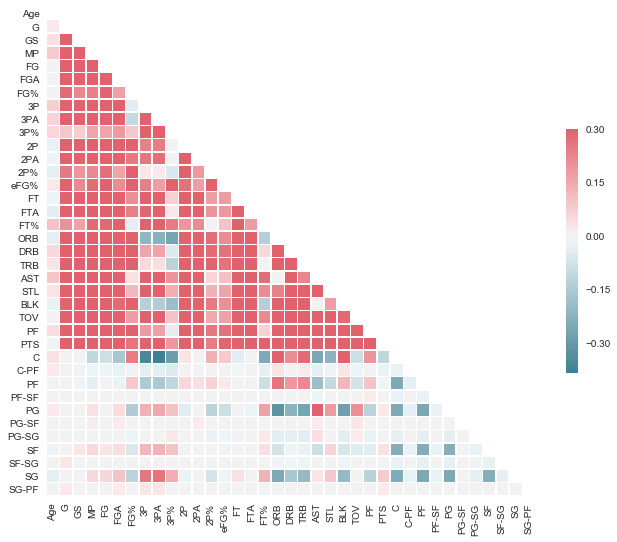

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D 

sns.set(style="white")

d = df2

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}))

In [100]:
def plot_embedding(X, y, title=None, num=10):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure(figsize=(18, 9))
    plt.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/num))
    
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

In [101]:
def plot_embedding3d(X, y, title=None):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure()
    
    ax = Axes3D(plt.figure(), rect=[0, 0, .95, 1], elev=48, azim=134)
    ax.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/10.))
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    if title is not None:
        plt.title(title)
    plt.show()

In [102]:
df2.columns

Index(['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'C', 'C-PF', 'PF', 'PF-SF', 'PG',
       'PG-SF', 'PG-SG', 'SF', 'SF-SG', 'SG', 'SG-PF'],
      dtype='object')

In [126]:
df3 = df2.drop(['C', 'C-PF', 'PF', 'PF-SF', 'PG', 'PG-SF', 'PG-SG', 'SF', 'SF-SG', 'SG', 'SG-PF'], axis=1)
df3 = df3.dropna()

In [127]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
subSpace = TSNE().fit_transform(df3.values)
#subSpace = PCA().fit_transform(df3.values)

## K-Means

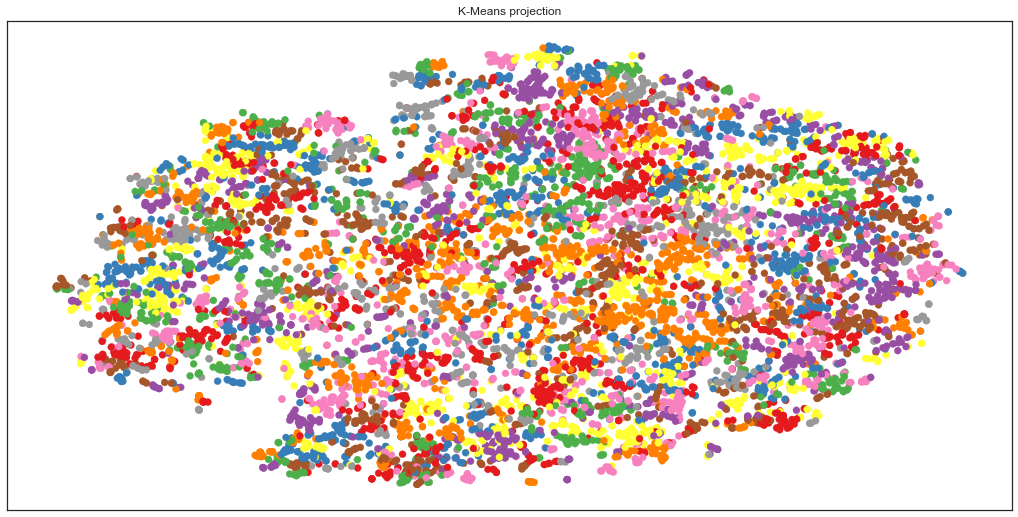

In [143]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=323, max_iter= 1000, n_init=10).fit(df3.values)
plot_embedding(subSpace, cluster.labels_, 'K-Means projection',323)

In [144]:
df4 = df3.copy(deep=True)
df4['label'] = cluster.labels_ 
df4.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,label
Player,,,,,,,,,,,,,,,,,,,,,
2000 Tariq Abdul-Wahad,-0.420200,0.511374,1.203142,0.617506,0.745881,0.888021,-0.077549,-0.837662,-0.684714,-0.939442,...,0.208804,0.980093,0.334981,0.566932,-0.082632,0.869006,0.238845,0.722062,0.621368,16
2000 Tariq Abdul-Wahad,-0.420200,-0.057930,0.843692,0.647567,0.887727,1.020888,0.011885,-0.837662,-0.627205,-1.155631,...,0.248244,0.980093,0.562744,0.731518,-0.082632,1.325203,-0.191887,0.979459,0.759680,16
2000 Tariq Abdul-Wahad,-0.420200,-1.234494,-0.450328,0.517301,0.225778,0.467275,-0.425351,-0.686131,-0.857243,1.345984,...,0.090485,0.855643,-0.348311,0.032026,-0.025474,-0.499587,0.884944,0.207268,0.189143,210
2000 Shareef Abdur-Rahim,-0.888298,1.308401,2.137713,1.960243,2.022496,1.995247,0.329875,-0.231538,-0.224638,0.122972,...,0.557187,2.224586,2.783441,2.747702,0.889065,1.097105,1.531042,2.395145,2.160091,20
2000 Cory Alexander,-0.186151,-0.703143,-0.737888,-0.845477,-0.908991,-0.706384,-1.448880,-0.383069,-0.224638,-0.154985,...,0.320549,-0.762199,-0.746897,-0.832053,0.146002,0.412808,-0.622620,-0.178828,-0.865487,317


In [145]:
name = '2019 LeBron James'
labnum = df4[df4.index == name].iloc[0].label
df4[df4['label'] == labnum]

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,label
Player,,,,,,,,,,,,,,,,,,,,,
2013 LeBron James,0.281947,1.080679,1.922043,1.819957,3.393675,2.482426,1.323593,1.283773,0.983063,0.765362,...,0.189084,0.482295,2.441796,1.883623,3.175410,2.465697,1.100310,2.395145,3.283877,143
2014 LeBron James,0.515995,1.118633,1.957988,1.799916,3.346393,2.438137,1.343467,1.435304,1.385629,0.598588,...,0.169364,0.233396,1.929327,1.431010,2.603823,2.237598,-0.191887,3.038638,3.335744,143
2015 LeBron James,0.750044,0.815004,1.670428,1.639589,2.873572,2.637438,0.558430,1.738366,1.903215,0.444167,...,-0.093566,-0.264401,1.587681,1.060691,3.232568,2.237598,0.669577,3.553433,3.024542,143
2016 LeBron James,0.984093,1.080679,1.922043,1.589487,3.204546,2.659582,0.876420,0.829179,1.213101,0.166210,...,0.044473,0.731194,1.986268,1.636743,2.889617,1.781401,0.454211,2.781241,3.024542,143
2016 Russell Westbrook,0.047898,1.232494,2.065823,1.469242,2.495316,2.548860,0.220566,1.132241,1.558158,0.085911,...,0.576907,1.104542,1.986268,1.801330,4.947327,3.149993,-0.191887,4.068227,2.713339,143
2017 LeBron James,1.218142,1.004772,1.850153,1.809937,3.299110,2.571004,1.154661,1.738366,1.730687,0.499759,...,-0.330203,0.482295,2.726500,2.130503,3.975631,1.325203,0.454211,3.810830,3.214721,143
2018 LeBron James,1.452191,1.308401,2.137713,1.719753,3.582803,2.814594,1.095037,1.889897,1.960725,0.524466,...,0.044473,0.357846,2.840382,2.130503,4.204265,1.781401,1.100310,3.939529,3.404900,143
2018 Russell Westbrook,0.515995,1.232494,2.065823,1.669651,3.109982,3.213195,0.170880,0.980710,1.443139,0.098265,...,0.083912,1.228991,3.238969,2.747702,4.890169,2.693796,-0.191887,4.711720,3.041831,143
2019 LeBron James,1.686240,0.283652,1.167197,1.549406,3.393675,2.947461,0.777048,2.192959,2.478311,0.351515,...,-0.389363,0.108947,2.783441,2.089356,3.746996,1.553302,0.454211,3.167337,3.387611,143


## Agglomerative Clustering

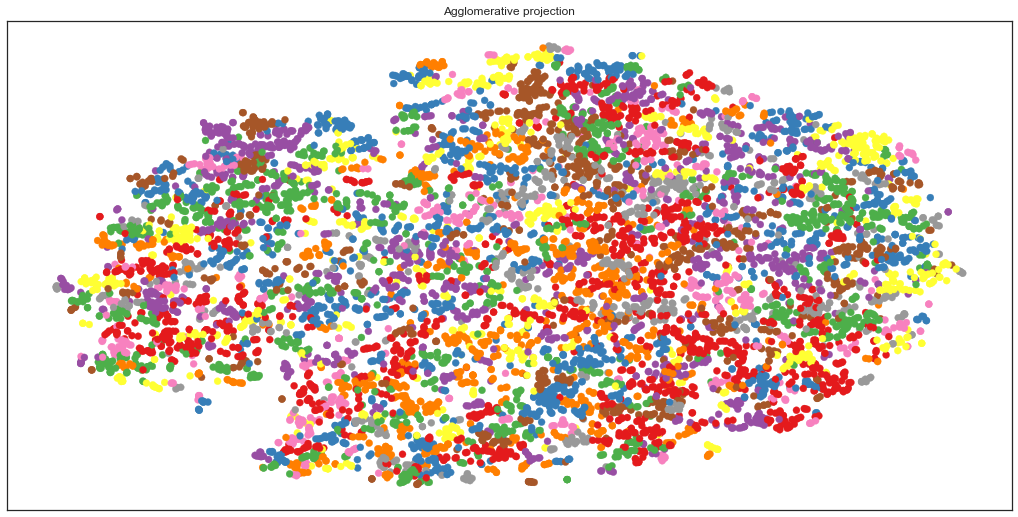

In [146]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=323).fit(df3.values)
plot_embedding(subSpace, cluster.labels_, 'Agglomerative projection',323)

In [147]:
df4 = df3.copy(deep=True)
df4['label'] = cluster.labels_ 
df4.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,label
Player,,,,,,,,,,,,,,,,,,,,,
2000 Tariq Abdul-Wahad,-0.420200,0.511374,1.203142,0.617506,0.745881,0.888021,-0.077549,-0.837662,-0.684714,-0.939442,...,0.208804,0.980093,0.334981,0.566932,-0.082632,0.869006,0.238845,0.722062,0.621368,65
2000 Tariq Abdul-Wahad,-0.420200,-0.057930,0.843692,0.647567,0.887727,1.020888,0.011885,-0.837662,-0.627205,-1.155631,...,0.248244,0.980093,0.562744,0.731518,-0.082632,1.325203,-0.191887,0.979459,0.759680,65
2000 Tariq Abdul-Wahad,-0.420200,-1.234494,-0.450328,0.517301,0.225778,0.467275,-0.425351,-0.686131,-0.857243,1.345984,...,0.090485,0.855643,-0.348311,0.032026,-0.025474,-0.499587,0.884944,0.207268,0.189143,297
2000 Shareef Abdur-Rahim,-0.888298,1.308401,2.137713,1.960243,2.022496,1.995247,0.329875,-0.231538,-0.224638,0.122972,...,0.557187,2.224586,2.783441,2.747702,0.889065,1.097105,1.531042,2.395145,2.160091,103
2000 Cory Alexander,-0.186151,-0.703143,-0.737888,-0.845477,-0.908991,-0.706384,-1.448880,-0.383069,-0.224638,-0.154985,...,0.320549,-0.762199,-0.746897,-0.832053,0.146002,0.412808,-0.622620,-0.178828,-0.865487,13


In [150]:
name = '2019 James Harden'
labnum = df4[df4.index == name].iloc[0].label
df4[df4['label'] == labnum]

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,label
Player,,,,,,,,,,,,,,,,,,,,,
2017 James Harden,0.047898,1.270448,2.101768,1.669651,2.542598,2.726016,0.081445,4.011331,4.433636,0.400929,...,0.806971,0.357846,2.555678,1.924770,5.404596,2.009500,0.238845,5.870008,3.681524,275
2018 James Harden,0.281947,0.928865,1.778263,1.569446,2.873572,2.991750,0.170880,4.768986,4.836202,0.524466,...,0.879276,-0.388851,1.302977,0.813811,4.032789,2.693796,0.669577,4.196926,3.906282,275
2019 James Harden,0.515995,1.156587,1.993933,1.709732,3.724649,3.966109,0.101320,6.435827,6.676508,0.530643,...,1.017315,-0.139952,1.872386,1.307570,3.289727,3.149993,0.669577,4.969118,4.891756,275


## Affinity Propagation

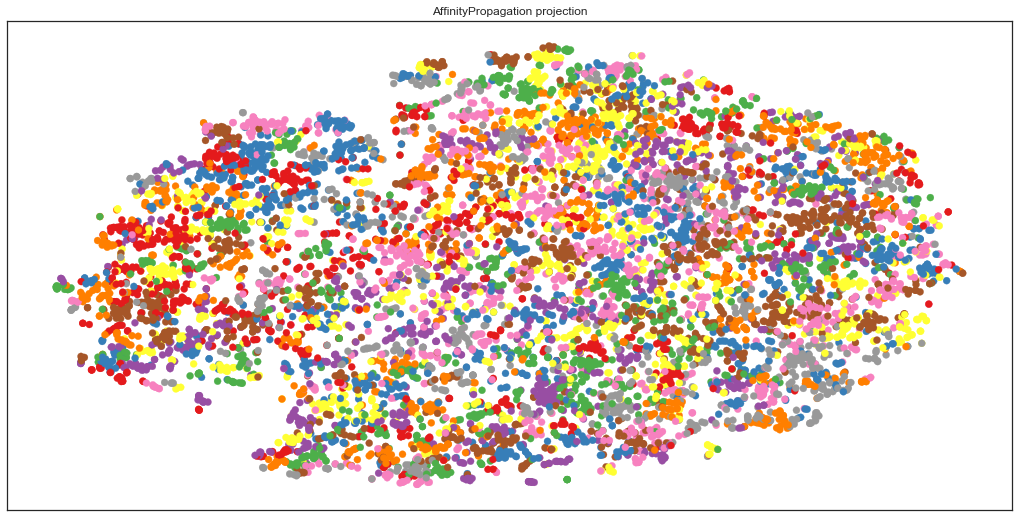

In [134]:
from sklearn.cluster import AffinityPropagation
cluster = AffinityPropagation(convergence_iter=15).fit(df3.values)
plot_embedding(subSpace, cluster.labels_, 'AffinityPropagation projection',323)

In [135]:
df4 = df3.copy(deep=True)
df4['label'] = cluster.labels_ 
df4.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,label
Player,,,,,,,,,,,,,,,,,,,,,
2000 Tariq Abdul-Wahad,-0.420200,0.511374,1.203142,0.617506,0.745881,0.888021,-0.077549,-0.837662,-0.684714,-0.939442,...,0.208804,0.980093,0.334981,0.566932,-0.082632,0.869006,0.238845,0.722062,0.621368,101
2000 Tariq Abdul-Wahad,-0.420200,-0.057930,0.843692,0.647567,0.887727,1.020888,0.011885,-0.837662,-0.627205,-1.155631,...,0.248244,0.980093,0.562744,0.731518,-0.082632,1.325203,-0.191887,0.979459,0.759680,193
2000 Tariq Abdul-Wahad,-0.420200,-1.234494,-0.450328,0.517301,0.225778,0.467275,-0.425351,-0.686131,-0.857243,1.345984,...,0.090485,0.855643,-0.348311,0.032026,-0.025474,-0.499587,0.884944,0.207268,0.189143,305
2000 Shareef Abdur-Rahim,-0.888298,1.308401,2.137713,1.960243,2.022496,1.995247,0.329875,-0.231538,-0.224638,0.122972,...,0.557187,2.224586,2.783441,2.747702,0.889065,1.097105,1.531042,2.395145,2.160091,135
2000 Cory Alexander,-0.186151,-0.703143,-0.737888,-0.845477,-0.908991,-0.706384,-1.448880,-0.383069,-0.224638,-0.154985,...,0.320549,-0.762199,-0.746897,-0.832053,0.146002,0.412808,-0.622620,-0.178828,-0.865487,232


In [142]:
year = 2019
name = 'Bradley Beal'
labnum = df4[df4.index == (str(year)+' '+name)].iloc[0].label
df4[df4['label'] == labnum]

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,label
Player,,,,,,,,,,,,,,,,,,,,,
2000 Ray Allen*,-0.654249,1.308401,2.137713,1.769855,2.306188,2.349559,0.230503,2.344490,1.960725,0.870368,...,1.069901,0.108947,0.505803,0.402345,1.174858,1.553302,-0.407253,1.365555,2.471293,288
2001 Ray Allen*,-0.420200,1.308401,2.137713,1.850019,2.258906,2.083825,0.478933,2.950614,2.363292,0.932136,...,1.076474,0.357846,0.847449,0.731518,1.632127,2.009500,-0.407253,1.751651,2.454004,288
2002 Cuttino Mobley,-0.186151,1.004772,1.850153,2.240815,2.400752,2.615293,0.061571,2.192959,2.018234,0.697417,...,0.826690,-0.015502,0.391922,0.278905,0.431796,2.009500,0.238845,1.622953,2.402137,288
2003 Ray Allen*,0.047898,1.080679,1.886098,1.819957,2.353470,2.504571,0.071508,3.102145,3.110916,0.586234,...,1.260525,0.357846,0.733567,0.649225,1.517809,1.781401,-0.407253,1.880350,2.540449,288
2003 Antoine Walker,-0.186151,1.156587,1.993933,2.180693,2.258906,2.947461,-0.435288,2.799083,3.398464,0.252686,...,-0.718025,0.482295,1.929327,1.554450,1.746444,2.009500,0.023479,2.781241,2.125513,288
2004 Peja Stojakovic,-0.186151,1.270448,2.101768,2.060448,2.495316,2.327414,0.478933,3.708269,2.995897,0.932136,...,1.332831,0.233396,1.473800,1.184131,0.203161,1.553302,-0.407253,0.979459,2.834362,288
2006 Jason Richardson,-0.420200,1.042726,1.886098,1.870059,2.637162,2.792449,0.141069,2.799083,2.765859,0.629472,...,-0.336776,0.606744,1.075213,0.978398,0.774747,1.553302,0.238845,1.365555,2.661472,288
2007 Joe Johnson,-0.420200,0.359560,1.239087,2.170672,3.062700,2.969605,0.389498,2.344490,2.248273,0.610942,...,0.156218,-0.015502,0.448862,0.320052,1.517809,1.097105,-0.407253,2.523843,2.972675,288
2008 Jason Richardson,0.047898,1.308401,2.137713,1.870059,2.353470,2.504571,0.091383,3.708269,3.283445,0.765362,...,0.182511,0.108947,1.075213,0.813811,0.774747,1.781401,0.669577,1.108158,2.419426,288
